In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
from scipy import stats
import time
import random
import itertools
from tabulate import tabulate


In [2]:
def erdos(n, p):
    #input:
    #n: number of nodes
    #p: probability of an edge to exist
    
    #output:
    #G: graph that is created through Erdos–Renyi model
    
    #create the graph
    G = nx.empty_graph(n)
    
    #possible edges
    ed = list(itertools.combinations(range(n), 2))
    
    for i in range(len(ed)):
        if random.random() < p:
            G.add_edge(*ed[i])
    return(G)

def barabasi_albert(n , l):
    #input:
    #n: number of nodes
    #l: number of neighbors that a newly arrived node comes with
    
    #output:
    #G: graph that is created through Barabasi–Albert model
    G = nx.Graph(Name = "Barabasi")
    G.add_node(1)
    G.add_node(2)
    G.add_edge(1,2)
    degree = G.degree()
    for i in range(3, n + 1):
        node_measures = dict(G.nodes())
        for node in node_measures:
            node_measures[node] = degree[node]
        a = np.array(list(node_measures.values()))
        prob = a / sum(a)
        nodes = np.array(list(G.nodes()))
        G.add_node(i)
        custm = stats.rv_discrete(name='custm', values=(nodes, prob))
        R = list(set(custm.rvs(size = l)))
        for j in R:
            G.add_edge(i,j)
    return(G)

def my_model(n , l, p):
    G = nx.Graph(Name = "Michele")
    G.add_node(1)
    G.add_node(2)
    G.add_edge(1,2)
    degree = G.degree()
    for i in range(3, n + 1):
        node_measures = dict(G.nodes())
        for node in node_measures:
            node_measures[node] = degree[node]
        a = np.array(list(node_measures.values()))
        nodes = np.array(list(G.nodes()))
        if random.random() < p:
            prob = a / sum(a)
        else:
            prob = np.array([1]*len(G)) / len(G)
        G.add_node(i)
        custm = stats.rv_discrete(name='custm', values=(nodes, prob))
        R = list(set(custm.rvs(size = l)))
        for j in R:
            G.add_edge(i,j)
    return(G)
        
    

def measure(grafo):
    #input:
    #grafo: graph
    
    #output:
    #node_measures: a dictionary that has as keys the nodes and as values the degree for each node
    #diameter: diameter of the graph
    #avg_cluster: clustering coefficient of the graph
    
    try:
        #computing the diameter of the graph
        diameter = nx.approximation.diameter(grafo)

    except:
        #if the graph is disconnected python raises an error
        #it happens just with graphs with few nodes
        diameter = math.inf
        
    #clustering coefficient of the graph, 
    e = nx.clustering(grafo)
    avg_cluster = sum(e.values())/len(e)
    
    #computing the degree for each node, like done in the lab
    degree = grafo.degree()
    node_measures = dict(grafo.nodes())
    for node in node_measures:
        node_measures[node] = degree[node]
    table = [['Information requested', 'Answers'], ['Number of nodes', len(grafo)],['Number of edges', len(grafo.edges())],
             ['Diameter', diameter], ['Clustering Coefficient', avg_cluster]]
    return(node_measures, diameter, avg_cluster, table)
    #print("The average clustering coeff: ", avg_cluster)

In [3]:
def erdos_hist(dic):  
    plt.figure(figsize=(10,6))
    plt.hist(dic.values(), bins = 30,color='darkgreen')
    plt.title("Degree distribution", fontsize= 20)
    plt.xlabel("Degree", fontsize =12)
    plt.ylabel("N. of nodes with x degree", fontsize = 12)
    plt.show()

### Barabasi-Albert Model

In [4]:
l = [3,5,7,10,5,5]
n = [10000,10000,10000,10000,20000,40000]
barabasi_trial = [barabasi_albert(n[i], l[i]) for i in range(6)]


In [ ]:
#l = [3,5]
#n = [500,500]
#barabasi_trial = [barabasi_albert(n[i], l[i]) for i in range(2)]

In [5]:
res_barabasi = []
for i in barabasi_trial:
    res_barabasi.append(measure(i))

In [6]:
diam = []
clus = []
for i in res_barabasi:
    diam.append(i[1])
    clus.append(i[2])

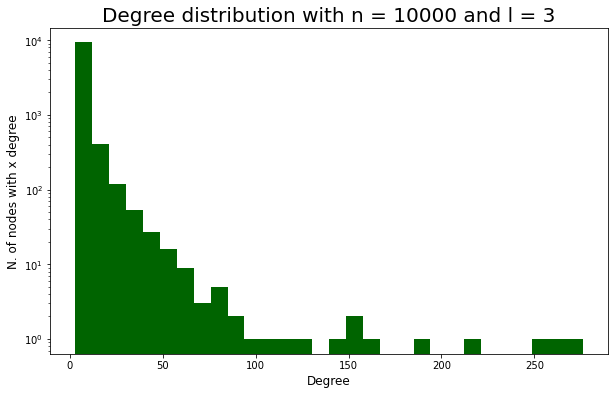

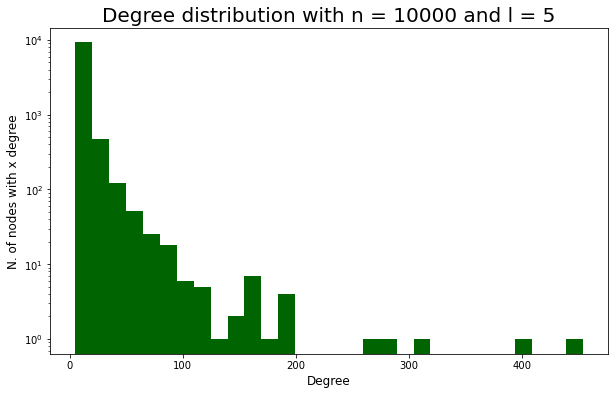

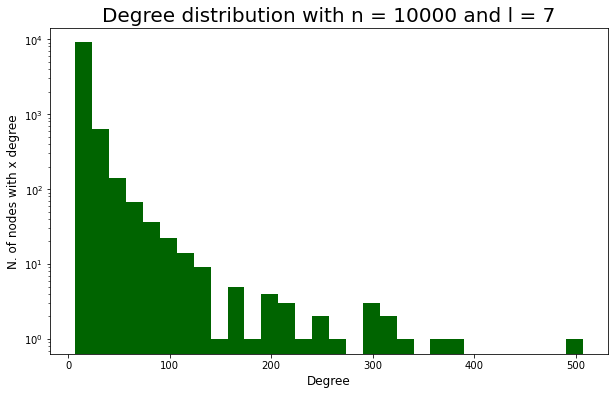

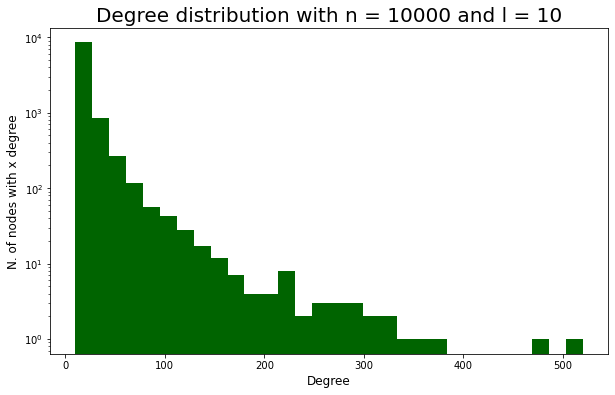

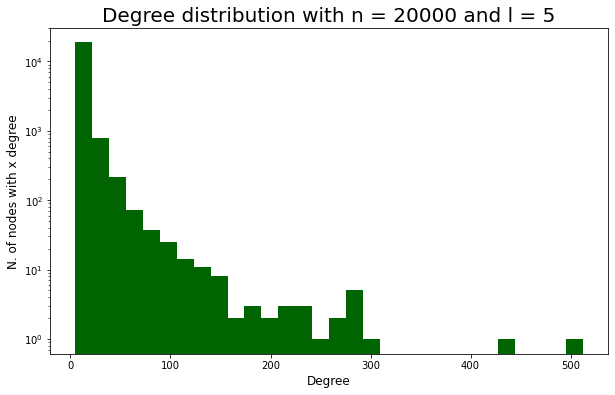

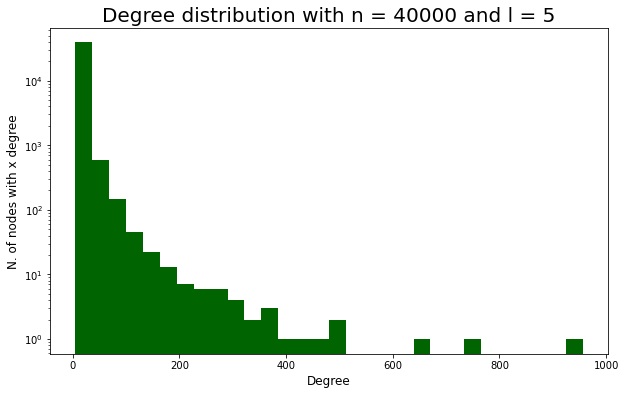

In [7]:
c=0
for i in res_barabasi:
    plt.figure(figsize=(10,6))
    plt.hist(i[0].values(), bins = 30, range = [l[c], max(i[0].values()) +2], color='darkgreen')
    plt.title(f"Degree distribution with n = "+str(n[c])+" and l = "+str(l[c]), fontsize = 20)
    plt.xlabel("Degree", fontsize =12)
    plt.ylabel("N. of nodes with x degree", fontsize = 12)
    plt.yscale('log')
    plt.show()
    #Nodes versus their degree
    #plt.figure(figsize=(10,6))
    #plt.bar(i[0].keys(), res_barabasi[0][0].values(), color='g')
    #plt.title(f"Degree distribution with n = "+str(n[c])+" and l = "+str(l[c]), fontsize = 20)
    #plt.xlabel("Node", fontsize =12)
    #plt.ylabel("Degree", fontsize = 12)
    #plt.yscale('log')
    #plt.show()
    c += 1

In [8]:
df = pd.DataFrame(list(zip(n, l, diam, clus)),
               columns =['Number of nodes', 'New edges at each step', 'Diameter', 'Average Cluster Coefficient'])
df

,Number of nodes,New edges at each step,Diameter,Average Cluster Coefficient
0,10000,3,7,0.004759
1,10000,5,5,0.007198
2,10000,7,5,0.008618
3,10000,10,4,0.009931
4,20000,5,6,0.003519
5,40000,5,6,0.002377


### Erdos-Renyi Model

In [ ]:
p = [0.1,0.3,0.5,0.9,0.5,0.5]
n = [10000,10000,10000,10000,50000,100000]
erdos_trial = [erdos(n[i], l[i]) for i in range(6)]

In [40]:
p = [0.1,0.5]
n = [500,500]
erdos_trial = [erdos(n[i], p[i]) for i in range(2)]

In [41]:
len(erdos_trial[0])

500

In [22]:
res_erdos = []
for i in erdos_trial:
    res_erdos.append(measure(i))

In [23]:
diam = []
clus = []
for i in res_erdos:
    diam.append(i[1])
    clus.append(i[2])

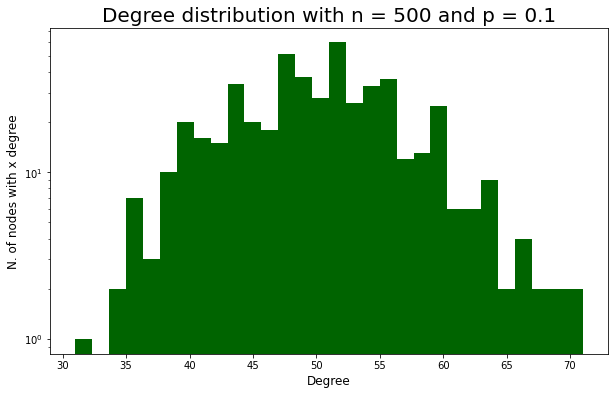

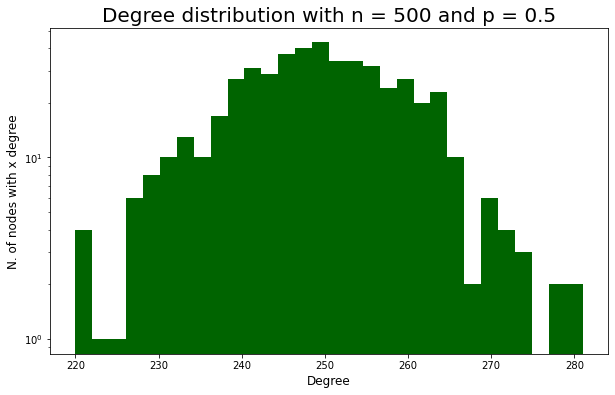

In [24]:
c=0
for i in res_erdos:
    plt.figure(figsize=(10,6))
    plt.hist(i[0].values(), bins = 30, color='darkgreen')
    plt.title(f"Degree distribution with n = "+str(n[c])+" and p = "+str(p[c]), fontsize = 20)
    plt.xlabel("Degree", fontsize =12)
    plt.ylabel("N. of nodes with x degree", fontsize = 12)
    plt.yscale('log')
    plt.show()
    #Nodes versus their degree
    #plt.figure(figsize=(10,6))
    #plt.bar(i[0].keys(), res_barabasi[0][0].values(), color='g')
    #plt.title(f"Degree distribution with n = "+str(n[c])+" and l = "+str(l[c]), fontsize = 20)
    #plt.xlabel("Node", fontsize =12)
    #plt.ylabel("Degree", fontsize = 12)
    #plt.yscale('log')
    #plt.show()
    c += 1

In [25]:
df_1 = pd.DataFrame(list(zip(n, p, diam, clus)),
               columns =['Number of nodes', 'New edges at each step', 'Diameter', 'Average Cluster Coefficient'])
df_1

,Number of nodes,New edges at each step,Diameter,Average Cluster Coefficient
0,500,0.1,3,0.101088
1,500,0.5,2,0.499530


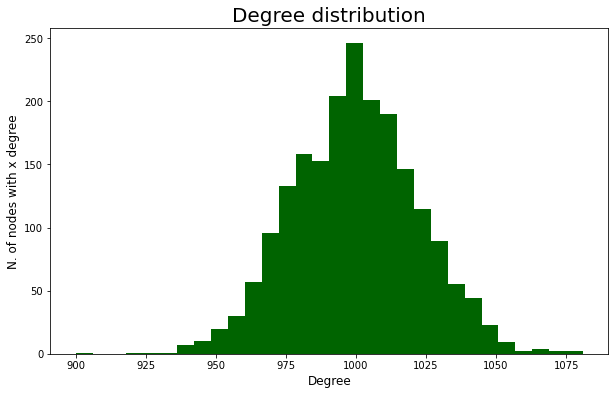

In [69]:
erdos_hist(r[0])

In [92]:
a = barabasi_albert(2000, l = 3)
#nx.info(a)
#nx.draw(a, with_labels = True)
r = measure(a)


In [93]:
print(tabulate(r[1], headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════════╤══════════════╕
│ Information requested   │      Answers │
╞═════════════════════════╪══════════════╡
│ Number of nodes         │ 2000         │
├─────────────────────────┼──────────────┤
│ Number of edges         │ 5970         │
├─────────────────────────┼──────────────┤
│ Diameter                │    6         │
├─────────────────────────┼──────────────┤
│ Clustering Coefficient  │    0.0172185 │
╘═════════════════════════╧══════════════╛


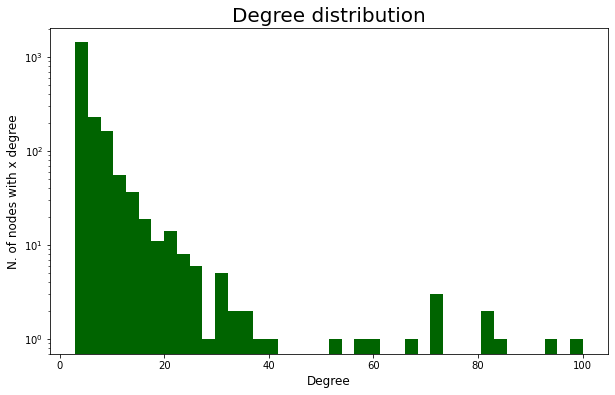

In [94]:
barabasi_hist(r[0])

## Trials

In [17]:
start_time = time.time()

erdos_trial = [erdos(5, 0.7)]
print(time.time() - start_time)


0.00014710426330566406


In [ ]:
erdos_trial = [erdos(500, 0.1),erdos(500, 0.2), erdos(500, 0.5), erdos(500, 0.9)]
diam = [measure(erdos_trial[i])[1] for i in range(4)]
cluster = [measure(erdos_trial[i])[2] for i in range(4)]
erdos_degree = [measure(erdos_trial[i])[0] for i in range(4)]
print(nx.info(erdos_trial[0]))
print("The diameter is: ", diam[0])
print("The clustering coefficient is: ", cluster[0])
plt.figure(figsize=(10,6))
plt.hist(erdos_degree[0].values(), bins= 20, color='orchid')
plt.title("Degree distribution", fontsize= 20)
plt.xlabel("Degree", fontsize =12)
plt.ylabel("N. of nodes with x degree", fontsize = 12)
plt.show()

print(nx.info(erdos_trial[1]))
print("The diameter is: ", diam[1])
print("The clustering coefficient is: ", cluster[1])
plt.figure(figsize=(10,6))
plt.hist(erdos_degree[1].values(), bins= 20, color='orchid')
plt.title("Degree distribution", fontsize= 20)
plt.xlabel("Degree", fontsize =12)
plt.ylabel("N. of nodes with x degree", fontsize = 12)
plt.show()

print(nx.info(erdos_trial[2]))
print("The diameter is: ", diam[2])
print("The clustering coefficient is: ", cluster[2])
plt.figure(figsize=(10,6))
plt.hist(erdos_degree[2].values(), bins= 20, color='orchid')
plt.title("Degree distribution", fontsize= 20)
plt.xlabel("Degree", fontsize =12)
plt.ylabel("N. of nodes with x degree", fontsize = 12)
plt.show()

print(nx.info(erdos_trial[3]))
print("The diameter is: ", diam[3])
print("The clustering coefficient is: ", cluster[3])
plt.figure(figsize=(10,6))
plt.hist(erdos_degree[3].values(), bins= 20, color='orchid')
plt.title("Degree distribution", fontsize= 20)
plt.xlabel("Degree", fontsize =12)
plt.ylabel("N. of nodes with x degree", fontsize = 12)
plt.show()

In [9]:
start_time = time.time()
barabasi_trial = [barabasi_albert(500, 2)]
print(time.time() - start_time)

start_time = time.time()
diam = measure(barabasi_trial[0])[1]
print(time.time() - start_time)

start_time = time.time()
cluster = measure(barabasi_trial[0])[2]
print(time.time() - start_time)

start_time = time.time()
barabasi_degree = measure(barabasi_trial[0])[0]
print(time.time() - start_time)

0.5017068386077881
0.010298967361450195
0.010036945343017578
0.009682178497314453


Graph with 500 nodes and 991 edges
The diameter is:  6
The clustering coefficient is:  0.03374669487184415


<ipython-input-10-99e491c9e3cf>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(barabasi_trial[0]))


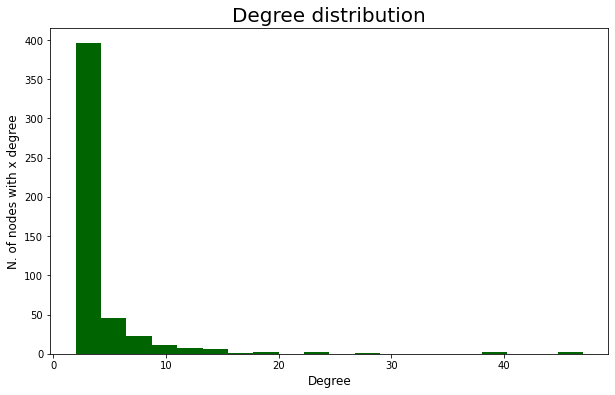

0.199354887008667


In [10]:
start_time = time.time()
print(nx.info(barabasi_trial[0]))
print("The diameter is: ", diam)
print("The clustering coefficient is: ", cluster)
plt.figure(figsize=(10,6))
plt.hist(barabasi_degree.values(), bins= 20, range=[2, 50], color='darkgreen')
plt.title("Degree distribution", fontsize= 20)
plt.xlabel("Degree", fontsize =12)
plt.ylabel("N. of nodes with x degree", fontsize = 12)
plt.show()
print(time.time() - start_time)

Name: 
Type: Graph
Number of nodes: 500
Number of edges: 991
Average degree:   3.9640
The diameter is:  7
The clustering coefficient is:  0.03374669487184415


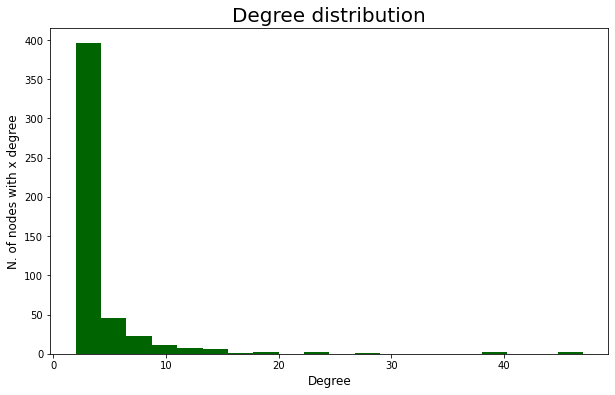

Name: 
Type: Graph
Number of nodes: 500
Number of edges: 1478
Average degree:   5.9120
The diameter is:  5
The clustering coefficient is:  0.05663342030314914


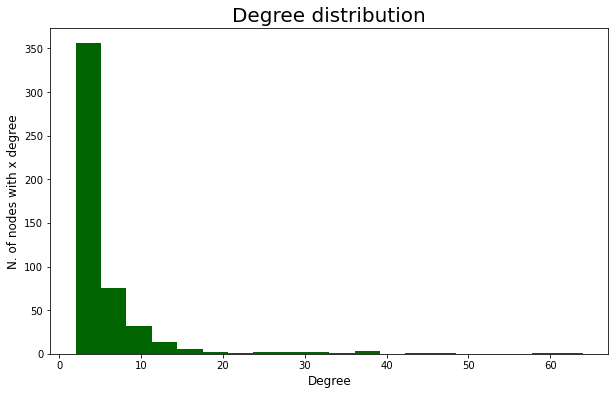

Name: 
Type: Graph
Number of nodes: 500
Number of edges: 2425
Average degree:   9.7000
The diameter is:  4
The clustering coefficient is:  0.071199597019607


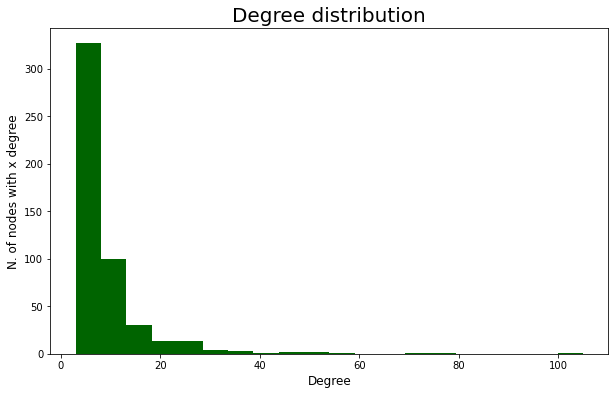

Name: 
Type: Graph
Number of nodes: 500
Number of edges: 3365
Average degree:  13.4600
The diameter is:  4
The clustering coefficient is:  0.07855880793357566


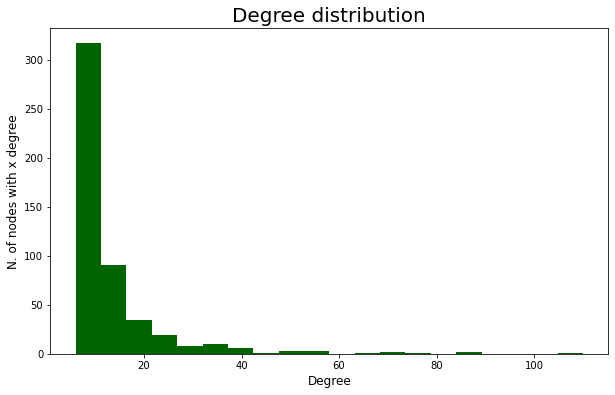

In [32]:
barabasi_trial = [barabasi_albert(500, 2), barabasi_albert(500, 3), barabasi_albert(500, 5), barabasi_albert(500, 7)]
diam = [measure(barabasi_trial[i])[1] for i in range(4)]
cluster = [measure(barabasi_trial[i])[2] for i in range(4)]
barabasi_degree = [measure(barabasi_trial[i])[0] for i in range(4)]
print(nx.info(barabasi_trial[0]))
print("The diameter is: ", diam[0])
print("The clustering coefficient is: ", cluster[0])
plt.figure(figsize=(10,6))
plt.hist(barabasi_degree[0].values(), bins= 20, color='darkgreen')
plt.title("Degree distribution", fontsize= 20)
plt.xlabel("Degree", fontsize =12)
plt.ylabel("N. of nodes with x degree", fontsize = 12)
plt.show()

print(nx.info(barabasi_trial[1]))
print("The diameter is: ", diam[1])
print("The clustering coefficient is: ", cluster[1])
plt.figure(figsize=(10,6))
plt.hist(barabasi_degree[1].values(), bins= 20, color='darkgreen')
plt.title("Degree distribution", fontsize= 20)
plt.xlabel("Degree", fontsize =12)
plt.ylabel("N. of nodes with x degree", fontsize = 12)
plt.show()

print(nx.info(barabasi_trial[2]))
print("The diameter is: ", diam[2])
print("The clustering coefficient is: ", cluster[2])
plt.figure(figsize=(10,6))
plt.hist(barabasi_degree[2].values(), bins= 20, color='darkgreen')
plt.title("Degree distribution", fontsize= 20)
plt.xlabel("Degree", fontsize =12)
plt.ylabel("N. of nodes with x degree", fontsize = 12)
plt.show()

print(nx.info(barabasi_trial[3]))
print("The diameter is: ", diam[3])
print("The clustering coefficient is: ", cluster[3])
plt.figure(figsize=(10,6))
plt.hist(barabasi_degree[3].values(), bins= 20, color='darkgreen')
plt.title("Degree distribution", fontsize= 20)
plt.xlabel("Degree", fontsize =12)
plt.ylabel("N. of nodes with x degree", fontsize = 12)
plt.show()

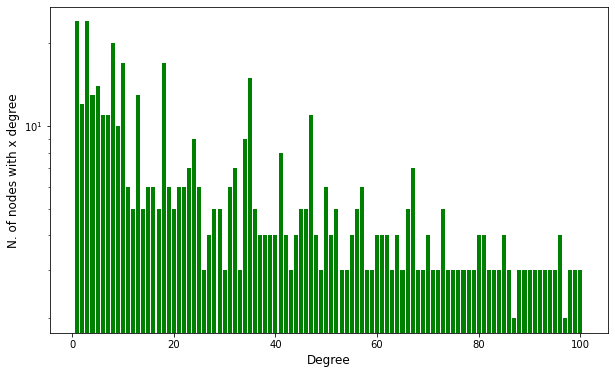

In [187]:
plt.figure(figsize=(10,6))
plt.bar(res_barabasi[0][0].keys(), res_barabasi[0][0].values(), color='g')
plt.xlabel("Degree", fontsize =12)
plt.ylabel("N. of nodes with x degree", fontsize = 12)
plt.yscale('log')
plt.show()


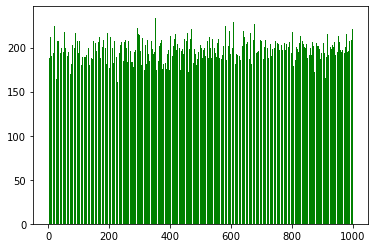

In [97]:
plt.bar(a.keys(), a.values(), color='g')
plt.show()

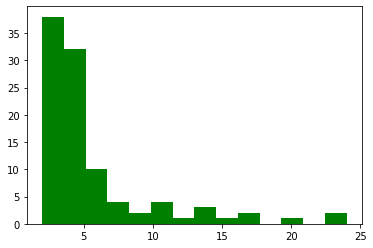

In [71]:
a = measure(t[0])[0]
plt.hist(a.values(), bins = 14, color='g')
plt.show()

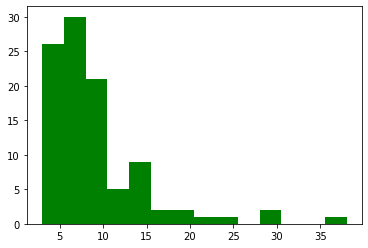

In [72]:
a = measure(t[1])[0]
plt.hist(a.values(), bins = 14, color='g')
plt.show()

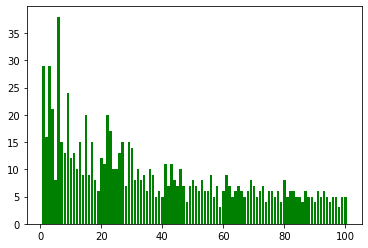

In [74]:
plt.bar(a.keys(), a.values(), color='g')
plt.show()

In [119]:
start_time = time.time()
a = erd(1000, 0.7)
print(time.time() - start_time)

0.582956075668335


In [114]:
start_time = time.time()
nx.approximation.diameter(a)
print(time.time() - start_time)

0.0059337615966796875


In [120]:
start_time = time.time()
e = nx.clustering(a)
c = sum(e.values())/len(e)
print(time.time() - start_time)

33.904279947280884


0.700244635139728

In [122]:
start_time = time.time()
t = nx.average_clustering(a)
print(time.time() - start_time)

34.31115388870239


In [123]:
t

0.700244635139728

### SNAP library

In [58]:
HepTh = pd.read_csv("ca-HepTh.txt", sep = "\t", header = None, names = ["node1", "node2"])
HepTh.head()

,node1,node2
0,24325,24394
1,24325,40517
2,24325,58507
3,24394,3737
4,24394,3905


In [59]:
paper = nx.from_pandas_edgelist(df, source ="node1", target ="node2", create_using=nx.Graph())
nx.info(paper)

<ipython-input-59-9cdfb39a9bca>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(paper)


'Graph with 9877 nodes and 25998 edges'

In [69]:
git = pd.read_csv("musae_git_edges.csv", sep = ",", header = 0, names = ["node1", "node2"])
git.head()

,node1,node2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982


In [68]:
github = nx.from_pandas_edgelist(git, source ="node1", target ="node2", create_using=nx.Graph())
nx.info(github)

<ipython-input-68-55a86e3c8213>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(github)


'Graph with 37700 nodes and 289003 edges'

In [70]:
fb = pd.read_csv("musae_facebook_edges.csv", sep = ",", header = 0, names = ["node1", "node2"])
fb.head()

,node1,node2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829


In [71]:
facebook = nx.from_pandas_edgelist(fb, source ="node1", target ="node2", create_using=nx.Graph())
nx.info(facebook)

<ipython-input-71-b2440b1f7c82>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(facebook)


'Graph with 22470 nodes and 171002 edges'